Learned kernel: 1.01**2 * RBF(length_scale=1.86) + WhiteKernel(noise_level=0.016)


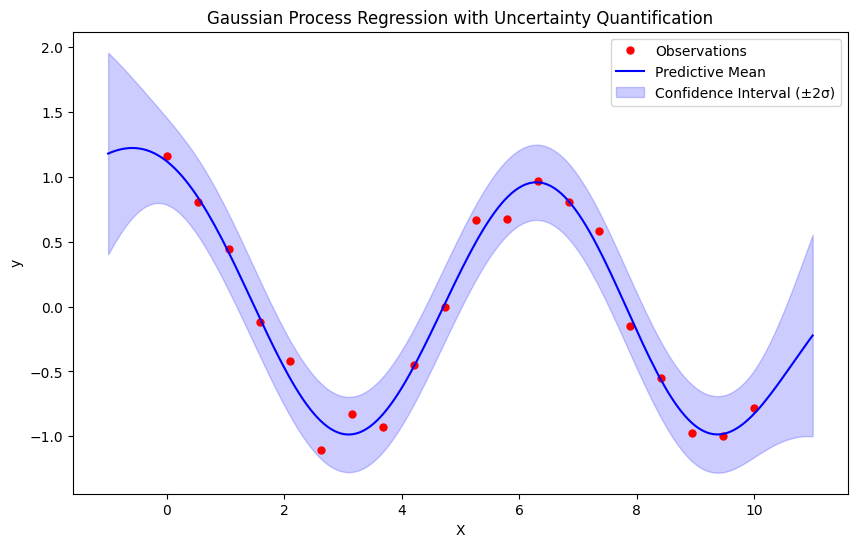

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

# ---------------------------
# 1. Generate Synthetic Data
# ---------------------------

# For reproducibility
np.random.seed(1)

# Create 20 training data points in the interval [0, 10]
X_train = np.linspace(0, 10, 20).reshape(-1, 1)

# Define the true function and add Gaussian noise
def f(x):
    return np.cos(x)

# Generate noisy observations
noise_std = 0.1
y_train = f(X_train).ravel() + np.random.normal(0, noise_std, X_train.shape[0])

# -----------------------------------
# 2. Define and Fit the Gaussian Process
# -----------------------------------

# Define a kernel:
#   - ConstantKernel scales the RBF kernel.
#   - RBF kernel defines smoothness and length scale.
#   - WhiteKernel adds noise to the diagonal (helps model noisy observations).
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) \
         + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-5, 1e1))

# Create the GaussianProcessRegressor with the kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP to our training data
gp.fit(X_train, y_train)

# Print the learned kernel parameters for inspection
print("Learned kernel:", gp.kernel_)

# -----------------------------------
# 3. Make Predictions and Quantify Uncertainty
# -----------------------------------

# Create test points for predictions (cover a slightly wider range than the training data)
X_test = np.linspace(-1, 11, 200).reshape(-1, 1)

# The GP's predict method can return both the mean and the standard deviation
y_pred, sigma = gp.predict(X_test, return_std=True)

# -----------------------------------
# 4. Visualization
# -----------------------------------

plt.figure(figsize=(10, 6))

# Plot the training data
plt.plot(X_train, y_train, 'r.', markersize=10, label='Observations')

# Plot the GP predictive mean
plt.plot(X_test, y_pred, 'b-', label='Predictive Mean')

# Plot the uncertainty band (typically ±2 standard deviations)
plt.fill_between(X_test.ravel(), y_pred - 2*sigma, y_pred + 2*sigma,
                 color='blue', alpha=0.2, label='Confidence Interval (±2σ)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression with Uncertainty Quantification')
plt.legend()
plt.show()


## Experiment 1: Understanding Kernel Properties
Let's start by visualizing how different kernels affect predictions. Here's a code outline:

In [5]:
import numpy as np
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
import matplotlib.pyplot as plt

# Create simple data
X = np.linspace(0, 10, 10).reshape(-1, 1)
y = np.sin(X.ravel()) + np.random.normal(0, 0.1, X.shape[0])

# Compare different kernels
kernels = {
    'RBF': RBF(length_scale=1.0),
    'Matern': Matern(length_scale=1.0, nu=1.5),
    'RationalQuadratic': RationalQuadratic(length_scale=1.0, alpha=0.1)
}

# Plot predictions for each kernel
# Add uncertainty bands

## Experiment 2: Exploring Noise Levels
Understanding how GPs handle noisy data is crucial. Here's an investigation you can try:

In [6]:
# Generate data with different noise levels
noise_levels = [0.05, 0.1, 0.5, 1.0]
X = np.linspace(0, 10, 20).reshape(-1, 1)

for noise in noise_levels:
    y = np.sin(X.ravel()) + np.random.normal(0, noise, X.shape[0])
    # Fit GP with and without explicit noise modeling
    # Compare predictions and uncertainty estimates

## Experiment 3: Non-stationary Functions
You've already encountered this with cos(x²). Let's explore it further:

In [7]:
def generate_nonstationary(x):
    return np.sin(x * (1 + x/10))  # Frequency increases with x

# Try different approaches:
# 1. Local kernel parameters
# 2. Different training point densities
# 3. Combined kernels

## Experiment 4: Multi-dimensional Inputs
Real-world data often has multiple features. Try:

In [8]:
# Generate 2D input data
X1, X2 = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
X = np.column_stack((X1.ravel(), X2.ravel()))

# Try different target functions
y = np.sin(X[:, 0]) * np.cos(X[:, 1])

# Visualize predictions using contour plots
# Explore anisotropic kernels (different length scales per dimension)

## Experiment 5: Active Learning
This is where GPs really shine - they tell us where we're uncertain:

In [9]:
# Start with few points
X_initial = np.random.uniform(0, 10, 5).reshape(-1, 1)
y_initial = f(X_initial) + noise

# Iteratively:
# 1. Fit GP
# 2. Find point of maximum uncertainty
# 3. Add that point to training set
# 4. Compare with random sampling

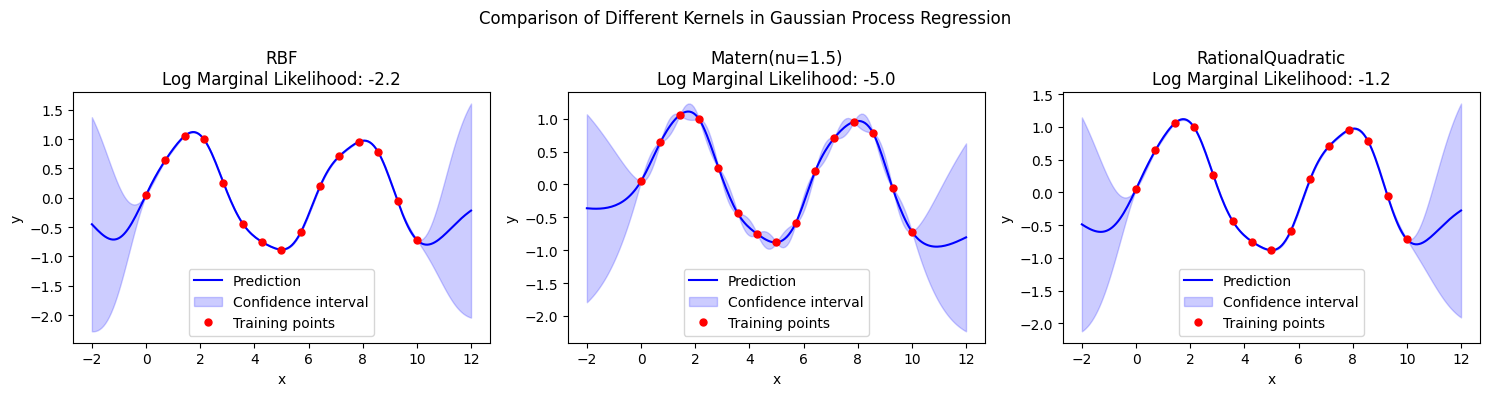

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic

# Set random seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.linspace(0, 10, 15).reshape(-1, 1)
y_train = np.sin(X_train.ravel()) + np.random.normal(0, 0.1, X_train.shape[0])

# Generate test points for smooth predictions
X_test = np.linspace(-2, 12, 200).reshape(-1, 1)

def plot_gp_comparison(X_train, y_train, X_test, kernels, suptitle):
    """
    Plot GP predictions with different kernels side by side
    """
    n_kernels = len(kernels)
    fig, axes = plt.subplots(1, n_kernels, figsize=(5*n_kernels, 4))
    
    for ax, (kernel_name, kernel) in zip(axes, kernels.items()):
        # Fit GP with current kernel
        gp = GaussianProcessRegressor(kernel=kernel, random_state=42)
        gp.fit(X_train, y_train)
        
        # Make predictions
        y_pred, sigma = gp.predict(X_test, return_std=True)
        
        # Plot
        ax.plot(X_test, y_pred, 'b-', label='Prediction')
        ax.fill_between(X_test.ravel(), 
                       y_pred - 2*sigma, 
                       y_pred + 2*sigma,
                       color='blue', alpha=0.2,
                       label='Confidence interval')
        ax.plot(X_train, y_train, 'r.', markersize=10, label='Training points')
        
        ax.set_title(f'{kernel_name}\nLog Marginal Likelihood: {gp.log_marginal_likelihood():.1f}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
    
    plt.suptitle(suptitle)
    plt.tight_layout()
    return fig

# Define different kernels to compare
kernels = {
    'RBF': RBF(length_scale=1.0),
    'Matern(nu=1.5)': Matern(length_scale=1.0, nu=1.5),
    'RationalQuadratic': RationalQuadratic(length_scale=1.0, alpha=1.0)
}

# Create the comparison plot
plot_gp_comparison(X_train, y_train, X_test, kernels, 
                  'Comparison of Different Kernels in Gaussian Process Regression')
plt.show()